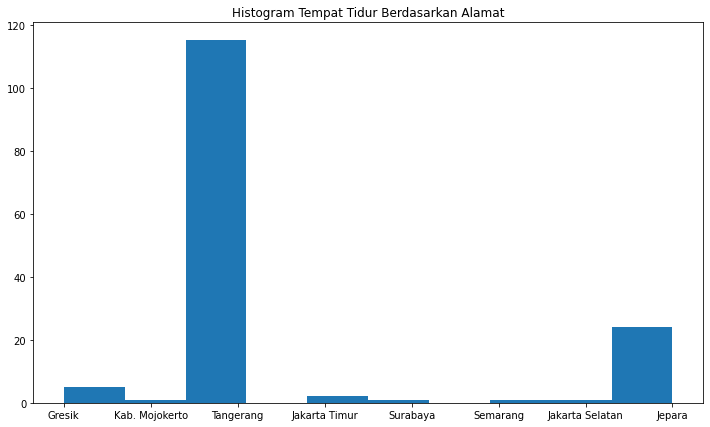

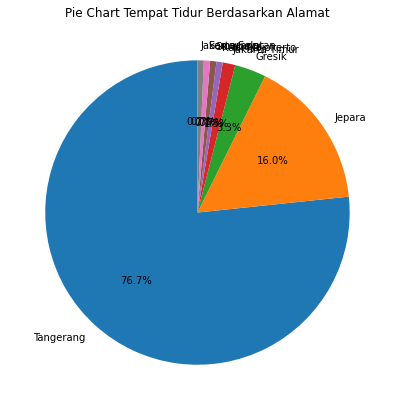

In [57]:

import requests # Digunakan untuk mengirim permintaan HTTP ke halaman web.
from bs4 import BeautifulSoup # Digunakan untuk mem-parsing dokumen HTML. 
import csv # Digunakan untuk membaca dan menulis data dalam format CSV

web_url = 'https://www.bukalapak.com/c/furniture-7321/tempat-tidur-7333/tempat-tidur-7489?page=' # Menyimpan link web bukalapak yang akan discraping ke variabel.


data = []  # List kosong untuk menyimpan data produk.

for page in range(1, 6): # Melakukan perulangan untuk scraping pada halaman 1 hingga 5.
    url = web_url + str(page)  # Digunakan untuk menggabungkan URL dasar dengan nomor halaman yang sedang diproses.
    req = requests.get(url)  # Digunakan untuk mengirim permintaan HTTP GET ke URL bukalapak.
    soup = BeautifulSoup(req.text, 'html.parser')  # Digunakan untuk membuat objek dari konten HTML yang diperoleh dari respons HTTP menggunakan parser HTML bawaan.
    product_items = soup.find_all('div', {'class': 'bl-product-card'})  # Digunakan untuk mencari semua elemen dalam halaman web yang memiliki tag <div> dan class 'bl-product-card'.
    
    for item in product_items: # Melakukan perulangan untuk mengambil masing-masing item yng telah dicari di variabel product_items.
        
        # Mengambil nama, alamat, harga, dan rating produk dari elemen-elemen yang ditemukan.
        name = item.find('a', {'class': 'bl-link'}).text.strip() # Digunakan untuk mengekstrak teks dari elemen <a> yang memiliki class 'bl-link'.
        address = item.find('span', {'class': 'mr-4 bl-product-card__location bl-text bl-text--body-14 bl-text--subdued bl-text--ellipsis__1'}).text.strip() # Digunakan untuk mengekstrak teks dari elemen <span> yang memiliki class yang spesifik dalam suatu elemen item.
        price = item.find('p', {'class': 'bl-text bl-text--subheading-20 bl-text--semi-bold bl-text--ellipsis__1'}).text.strip() # Digunakan untuk mengekstrak teks dari elemen <p> yang memiliki class yang spesifik dalam suatu elemen item.
        data.append([name, address, price])  # Menyimpan data dalam list data.
        
csv_file = 'data_tempattidur.csv'  # Deklarasi nama file CSV untuk menyimpan data.

with open(csv_file, 'w', newline='', encoding='utf-8') as file: # Membuka file csv_file dengan mode write ('w') untuk menulis data.
    writer = csv.writer(file) # Digunakan untuk membuat objek penulis (writer) dari modul CSV yang akan digunakan untuk menulis data ke dalam file CSV.
    writer.writerow(['Name', 'Address', 'Price'])  # Digunakan untuk menulis baris header ke dalam file CSV.
    writer.writerows(data)  # Digunakan untuk menulis multiple baris data ke dalam file CSV yang sedang dibuka.




import pandas as pd # Digunakan untuk mengimpor modul Pandas ke dalam script.
import matplotlib.pyplot as plt # Digunakan untuk mengimpor modul Matplotlib ke dalam script.

# Digunakan untuk membaca file CSV dengan nama "data_aksesoris.csv".
data = pd.read_csv("data_tempattidur.csv")

# Digunakan untuk membuat sebuah figur baru dalam visualisasi dengan ukuran 12x7 inci.
plt.figure(figsize=(12, 7))

# Menghitung jumlah kemunculan tiap nilai dalam kolom 'Address'.
plt.hist(data['Address'])

# Menambahkan judul.
plt.title("Histogram Tempat Tidur Berdasarkan Alamat")

# Menyimpan Histogram dalam format JPG dengan nama file 'Histogram_Aksesoris.jpg'.
plt.savefig('Histogram_tempattidur.jpg', dpi=300, bbox_inches='tight')

# Menampilkan hasil Histogram.
plt.show()




import pandas as pd # Digunakan untuk mengimpor modul Pandas ke dalam script.
import matplotlib.pyplot as plt # Digunakan untuk mengimpor modul Matplotlib ke dalam script.

# Digunakan untuk membaca file CSV dengan nama "data_aksesoris.csv".
data = pd.read_csv("data_tempattidur.csv")

# Digunakan untuk membuat sebuah figur baru dalam visualisasi dengan ukuran 12x7 inci.
plt.figure(figsize=(12, 7))

data['Address'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)  # Membuat pie chart dengan persen.
plt.ylabel('') # Menghapus label sumbu Y.

# Menambahkan judul.
plt.title("Pie Chart Tempat Tidur Berdasarkan Alamat")

# Menyimpan Pie Chart dalam format JPG dengan nama file 'PieChart_Aksesoris.jpg'.
plt.savefig('PieChart_Tempattidur.jpg', dpi=300, bbox_inches='tight')

# Menampilkan hasil Pie Chart.
plt.show()




